# What is Logistic Regression

## Introduction

### Logistic Regression is a machine learning algorithm primarily used for classification tasks. Unlike Linear Regression, which predicts continuous outcomes, Logistic Regression estimates the probability that a given input belongs to a particular category. It's useful when the dependent variable is binary, such as yes/no or true/false scenarios.



## How Does Logistic Regression Work?

### Logistic Regression models the relationship between inputs and the probability of a particular outcome. It uses the logistic (sigmoid) function to map predicted values to probabilities between 0 and 1. The model calculates a weighted sum of the input features and applies the sigmoid function to this sum to obtain the probability of the positive class.

### The sigmoid function: $y = \frac{1}{1+e^{-(wx +b)}}$

*   w = learned weights
*   b = bias term
*   x = input
*   y = output probability

### The output of this function when applied to training data is a probability. For instance, we can input some data about weather, and y is a binary variable 1 if you will go outside, 0 otherwise. If the model outputs 0.1, this means that it predicts you will not go outside. The model will likewise predict that you will not go outside if on a new piece of data it outputs y = 0.3. However, the model is more certain when y = 0.1 than when y = 0.3.

## Types of Logistic Regression

### Depending on the nature of the dependent variable, Logistic Regression can be categorized into:

*   Binary Logistic Regression: Targets two possible outcomes (ex. spam or not spam)
*   Multinomial Logistic Regression: Handles scenarios with three or more unordered categories (ex. types of fruits)
*   Ordinal Logistic Regression: Deals with three or more ordered

# Logistic Regression in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_balanced, y_train_balanced)

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.9583
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.83      0.64      0.72      1703

    accuracy                           0.96     20000
   macro avg       0.90      0.82      0.85     20000
weighted avg       0.96      0.96      0.96     20000



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualizing Results

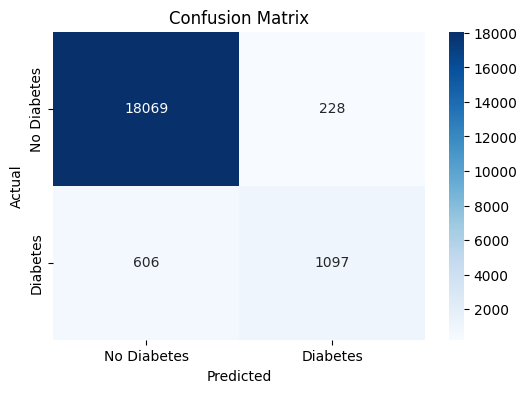

In [3]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1097 people with diabetes were correctly predicted to have it.
*   True Negatives - 18069 people without diabetes were correctly predicted to not have it.
*   False Positives - 228 people without diabetes were wrongly predicted to have it.
*   False Negatives - 606 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people without diabetes (98.75% accuracy), but it's less accurate at finding those with diabetes (64.42% accuracy).

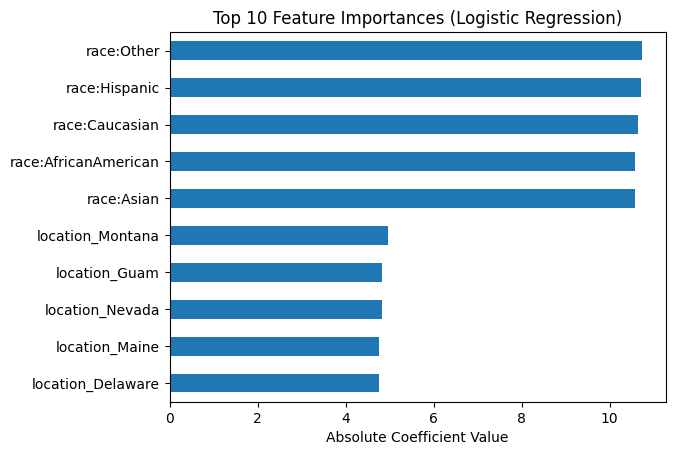

In [4]:
coef_series = pd.Series(lr.coef_[0], index = X.columns)
coef_series_abs = coef_series.abs().sort_values(ascending = False)

coef_series_abs.head(10).plot(kind = 'barh', title = 'Top 10 Feature Importances (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

*   All top featuers are race, then location
*   All races had the biggest weights, all being close too, meaning the model used them most when predicting diabetes

###According to this model, race had the strongest influence on predicted diabetes, followed by where they live - more than personal health or habits.